# Atividade Prática 2.2 - CIFAR 10

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *Aurelio Aquino*
* Integrante 2: *Jailson Bina*
* Integrante 3: *Sthephany Costa*
* Integrante 4: *Erica Veras*
* Integrante 5: *Michelle de Carvalho*
* Integrante 6: *Fabiano Dolzanes*


## Contexto: Classificação de Imagens

O CIFAR-10 é um conjunto de dados amplamente utilizado na comunidade de aprendizado de máquina e visão computacional para fins de treinamento e avaliação de algoritmos de classificação de imagem. O nome "CIFAR" é uma abreviação de "Canadian Institute for Advanced Research" (Instituto Canadense de Pesquisa Avançada), que é a organização que inicialmente coletou e disponibilizou esse conjunto de dados.

## Base de Dados

Disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import keras

In [ ]:
## Abrir a base de dados
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

## Análise exploratória

1. Quantos exemplos há no conjunto de treino?
2. Quantos exemplos há no conjunto de teste?
3. Imprima o exemplo 42 do conjunto de treinamento.
4. Quantas classes há na tarefa? Qual a nomenclatura?
5. Imprima uma amostra de exemplos do conjunto de treinamento
6. As classes estão balanceadas no treinamento?


In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i])
plt.show()

## Normalização dos dados de treinamento

Para uma melhor performance dos modelos de Redes Neurais no treinamento em bases de dados grandes, o ideal é que os valores de entrada estejam no intervalo [0,1]


 Relembre que neste cenário que as entradas são matrizes 32x32 de pixels e que o maior valor que um pixel pode assumir é 255

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_test)

### Data Augmentation

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 15,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.15,
    validation_split=0.1
)
datagen.fit(X_train)

## Definição do modelo

Vamos construir uma Rede Neural Convolucional simples, lembrando que:

- A dimensão da entrada é 32x32x1.
- A Rede convolucional possui estrutura sequencial.
- O problema é relativamente simples, pois não há informações de cores.  

Essa rede neural terá as seguintes camadas:

1. Camada convolucional 2D com 32 neurônios, função relu e filtros (3,3)
2. Camada MaxPooling 2D com filtros 2x2
3. Camada Flatten
4. Rede Neural MLP com 2 camadas para classificar as características extraídas.
  - Camanda Densa com 100 neurônios e função de ativação ReLU.
  -  Camanda Densa com 1 neurônio para cada classe do problema e função de ativação softmax.


In [ ]:
INPUT_SHAPE = (32, 32, 3)
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

### Otimizador Adam

In [ ]:
optAdam = keras.optimizers.Adam()

In [ ]:
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer=optAdam)

## Visualize a quantidade de parâmetros que o modelo possui

In [ ]:
model.summary()

## Treinamento do Modelo

Efetue o treinamento do modelo com os seguintes parâmetros:

- Épocas: 20
- batch_size = 32
- validation_split = 0.1
- verbose = 1

### Placa de Video

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

### Callbacks

In [ ]:
csvloggercb = keras.callbacks.CSVLogger('log.csv')
earlystopcb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, verbose=True)
modelcheckpointcb = keras.callbacks.ModelCheckpoint('model.h5', 'val_accuracy', save_best_only=True)

In [ ]:
model.fit_generator(
    datagen.flow(X_train,
    y_train_categorical),
    epochs=EPOCHS,
    verbose=1,
    callbacks=[csvloggercb, earlystopcb, modelcheckpointcb]
)

## Visualize os gráficos de treinamento do modelo

- Perda (loss)
- Acurácia

In [ ]:
import pandas as pd

df = pd.read_csv('log.csv')
df.tail()

In [ ]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.show()

In [ ]:
plt.plot(df['accuracy'])
plt.plot(df['val_accuracy'])
plt.show()

## Análise de Desempenho

Efetue a previsão do modelo para o conjunto de testes e calcule as seguintes métricas

- Acurácia
- F1-Score

Visualize também a matriz de confusão para as previsões efetuadas

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [ ]:
y_prev_categorical = model.predict(X_test)
y_prev = np.argmax(y_prev_categorical, axis=1)

In [ ]:
accuracy_score(y_test, y_prev)

In [ ]:
f1_score(y_test, y_prev, average='macro')

## Previsões com a MobileNet

A MobileNet é uma arquitetura de rede neural convolucional (CNN) projetada para aplicações de visão computacional em dispositivos móveis e com recursos limitados de computação. Ela foi desenvolvida pelo Google em 2017 para atender à crescente demanda por modelos de aprendizado profundo eficientes em termos de computação e recursos para dispositivos móveis, como smartphones e tablets.

O principal objetivo do MobileNet é oferecer desempenho suficiente para tarefas de visão computacional, como detecção de objetos e reconhecimento de imagem, enquanto mantém uma arquitetura leve e eficiente.

Consulte: https://keras.io/api/applications/mobilenet/

In [ ]:
from keras.applications import MobileNetV2

mobile = MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, classes=10)

x = keras.layers.BatchNormalization()(mobile.output)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(100, 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(100, 'relu')(x)
predictions = keras.layers.Dense(10, 'softmax')(x)
mobile = keras.models.Model(mobile.input, predictions)
mobile.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
csvloggercb = keras.callbacks.CSVLogger('log-mobile.csv')
earlystopcb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, verbose=True)
modelcheckpointcb = keras.callbacks.ModelCheckpoint('mobile.h5', 'val_accuracy', save_best_only=True)
cbs = [csvloggercb, earlystopcb, modelcheckpointcb]

In [40]:
mobile.fit(X_train, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1, callbacks=cbs)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5476 - accuracy: 0.4378

/home/aurelio/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 148s 105ms/step - loss: 1.5476 - accuracy: 0.4378 - val_loss: 3.8463 - val_accuracy: 0.4090
Epoch 2/100
1407/1407 [==============================] - 176s 125ms/step - loss: 1.2708 - accuracy: 0.5814 - val_loss: 2.0458 - val_accuracy: 0.5070
Epoch 3/100
1407/1407 [==============================] - 175s 124ms/step - loss: 1.1326 - accuracy: 0.6450 - val_loss: 2.1735 - val_accuracy: 0.5152
Epoch 4/100
1407/1407 [==============================] - 103s 73ms/step - loss: 1.0716 - accuracy: 0.6662 - val_loss: 1.8816 - val_accuracy: 0.5514
Epoch 5/100
1407/1407 [==============================] - 88s 62ms/step - loss: 1.0198 - accuracy: 0.6863 - val_loss: 1.5760 - val_accuracy: 0.6270
Epoch 6/100
1407/1407 [==============================] - 177s 126ms/step - loss: 0.9829 - accuracy: 0.7014 - val_loss: 1.1685 - val_accuracy: 0.6708
Epoch 7/100
1407/1407 [==============================] - 169s 120ms/step - loss: 0.9596 - accuracy: 0.7108 - val_loss: 2.

In [41]:
import pandas as pd

df = pd.read_csv('log-mobile.csv')
df.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
53,53,0.839689,0.629698,0.7402,1.031448
54,54,0.847444,0.622111,0.7406,0.848133
55,55,0.844867,0.630883,0.7672,0.774261
56,56,0.841400,0.641378,0.7734,0.814477
57,57,0.845044,0.605454,0.7490,1.064519


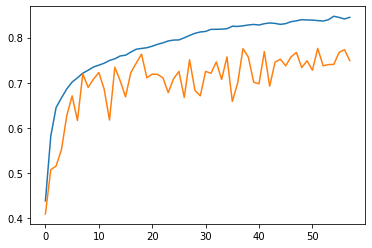

In [42]:
plt.plot(df['accuracy'])
plt.plot(df['val_accuracy'])
plt.show()